<h1>Scikit-Learn</h1>
<h2>Decision Tree Classification example with Iris dataset</h2>
<p>In this task 3.1P I will demonstrate the commands and their functionalities in helping us classify an Iris datset using decision trees.</p>
<p>First I will start with importing the <i>pandas</i> library and <i>iris</i> dataset.</p>

In [2]:
import pandas as pd
from sklearn.datasets import load_iris

<p>We are now using the variable <i>iris</i> to store the loaded iris dataset.</p>

In [3]:
iris = load_iris()

<p>The variable <i>df</i> is used alongside with the <b>pandas.DataFrame()</b> function to load the data contained in Iris to a proper dataset with the column names. We also add a <i>target</i> column for future use.</p>

In [4]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target

<p>Now that the dataset has been properly formatted we can now prepare the dataset to train and test the decision tree classifier. We do this by importing the <i>train_test_split</i> function from the <i>sklearn.model_selection</i> library.</p>
<p>Then the imported command is used to organize the data that will be trained and tested accordingly. Here we can also pass additional inputs such as the test size, which divides the data at a percentage passed to it(0.33 in this case) the remainder would then be the train size, and random state, which controls the shuffling applied to the data before splitting it.</p>

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(df[iris.feature_names], df['target'], test_size=0.33, random_state=2)

<p>The output of the above function is shown below. It is clearly shown that the rows from <i>df</i> is divided at <sup>1</sup>/<sub>3</sub> for testing and <sup>2</sup>/<sub>3</sub> for training the algorithm.</p>
<p style="text-align: centre;"> 
    <img src=img/df.png width=400px>
</p>

<p>Now we will import the decision tree module from sklearn library.</p>

In [6]:
from sklearn import tree

<p>Now we use <i>clf</i> to hold the <b>DecisionTreeClassifier()</b> command. What I meant by hold is the <i>clf</i> variable is used in place of <i>tree.DecisionTreeClassifier()</i> so we have less work to do down the line.</p>

In [7]:
clf = tree.DecisionTreeClassifier()

<p>Now we use our shortened <i>clf</i> to run the <b>fit()</b> function. The <i>clf.fit(X_train, Y_train)</i> method is passed the <i>X_train</i> and <i>Y_train</i> datasets to build a decision tree classifier from the training set (X_train, Y_train).</p>
<p>Here <mark>clf.fit(X_train, Y_train)</mark> expands to <mark>tree.DecisionTreeClassifier.fit(X_train, Y_train)</mark>.</p>

In [8]:
clf.fit(X_train, Y_train)

DecisionTreeClassifier()

<p>Now that the decision tree classifier has been trained we can test it by using the <b>predict()</b> function. This will let us run the function <mark><b>tree.DecisionTreeClassifier.predict()</b></mark> which will take the <i>X_test</i> dataset we split earlier to make it predict values it think is right for it. We then put this predicted dataset into <i>Y_pred</i>.</p>

In [9]:
Y_pred = clf.predict(X_test)

<p>Now that we have the predicted output (Y_pred) and real output(Y_test), we can test how our decision tree classifier worked by passing to the <b>accuracy_score()</b> function from sklearn. This function takes both inputs and gives an output from 0 - 1 which represents how successful out classifier has been. Here we have an accuracy score of 0.96 which is pretty good.</p>

In [10]:
from sklearn.metrics import accuracy_score
print(accuracy_score(Y_pred, Y_test))

0.96


<p>As the above method to calculate the accuracy score has a bit of an overhead by importing another library module we can also use the <b><mark>tree.DecisionTreeClassifier.score()</b></mark> function to give us an accuracy score. Which takes the <i>X_test</i> and <i>Y_test</i> datasets as inputs to replace the last 3 lines of code we executed; thereby making our lives easier.</p>

In [25]:
x = clf.score(X_test, Y_test)
print(x)

0.96


<p>The <b><mark>tree.DecisionTreeClassifier.get_params()</b></mark> function gives us an output which contains all the parameters set for the current classifier. Some of which are values we assigned to it and some are default.</p>

In [27]:
clf.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

<p> The functions <b><mark>tree.DecisionTreeClassifier.get_n_leaves()</b></mark> and <b><mark>tree.DecisionTreeClassifier.get_depth()</b></mark> as the name sugests are used to output the values they hold. <i>get_n_leaves()</i> means it returns the number of leaves in the decision tree. <i>get_depth()</i> means the output will be the depth of the decision tree which will be the maximum distance between the root and any leaf.</p>

In [44]:
print(clf.get_n_leaves())
print(clf.get_depth())

7
4


<p>Now that we have successfully made a demo of the decision tree classifier and taken a look at its workings, it is now time to visualize the tree. It is possible to generate the the below diagram without importing <i>matplotlib.pylot</i> but I have done so that the diagram generated will be pleasing to look at. The only use of <i>pyplot</i> is to set the <i>dpi</i> parameter so that the diagram will be big.</p>
<p>The <i>fn</i> array stores the strings which describe the data as sepal and petal length and width. The <i>cn</i> array stores the class names as strings.</p>
<p>All these variables are now put into the main function which generates the diagram using the function <mark><b>tree.plot_tree()</b></mark>. It takes the arguments plot type(tree), label names, formatting options, and filled parameter which is used to paint the nodes for better visualization.</p>

[Text(232.5, 339.75, 'petal width (cm) <= 0.8\nsamples = 100\nvalue = [30, 34, 36]\nclass = virginica'),
 Text(174.375, 264.25, 'samples = 30\nvalue = [30, 0, 0]\nclass = setosa'),
 Text(290.625, 264.25, 'petal width (cm) <= 1.65\nsamples = 70\nvalue = [0, 34, 36]\nclass = virginica'),
 Text(116.25, 188.75, 'petal length (cm) <= 4.95\nsamples = 35\nvalue = [0, 33, 2]\nclass = versicolor'),
 Text(58.125, 113.25, 'samples = 32\nvalue = [0, 32, 0]\nclass = versicolor'),
 Text(174.375, 113.25, 'petal width (cm) <= 1.55\nsamples = 3\nvalue = [0, 1, 2]\nclass = virginica'),
 Text(116.25, 37.75, 'samples = 2\nvalue = [0, 0, 2]\nclass = virginica'),
 Text(232.5, 37.75, 'samples = 1\nvalue = [0, 1, 0]\nclass = versicolor'),
 Text(465.0, 188.75, 'petal length (cm) <= 4.85\nsamples = 35\nvalue = [0, 1, 34]\nclass = virginica'),
 Text(406.875, 113.25, 'sepal width (cm) <= 3.1\nsamples = 3\nvalue = [0, 1, 2]\nclass = virginica'),
 Text(348.75, 37.75, 'samples = 2\nvalue = [0, 0, 2]\nclass = virgini

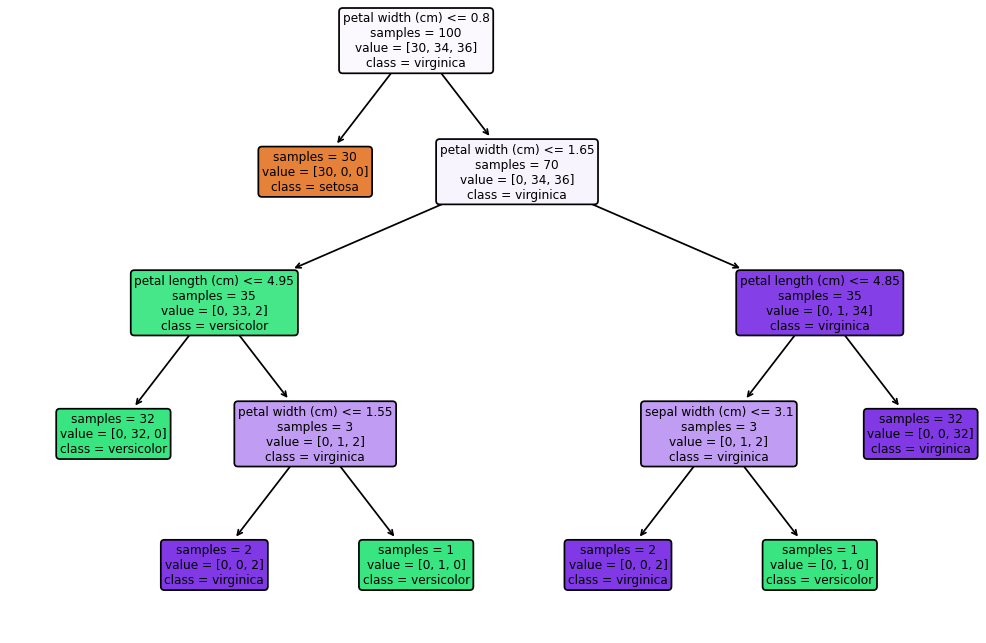

In [64]:
import matplotlib.pyplot as plt
plt.figure(dpi=125)

fn = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
cn = ['setosa', 'versicolor', 'virginica']
tree.plot_tree(clf, feature_names=fn, class_names=cn, rounded=True, fontsize=7, filled=True, impurity=False)

<h5>Made by Andrew Eymard 220415619</h5>